Тестовое задание на позицию: Эксперт по медиа исследованиям.
Инструменты: Python (Библиотека pandas и др.)
Тестируемые навыки: Знание методов обработки и анализа медийных данных.

Задание:
1) Импортировать через Python файл Finance_category_tv.csv
2) Добавить колонки: 
- week (Дата) (Дата начала недели)
- month (Дата) (Дата начала месяца)
- year (Число) (Год)

3) Показать ТОП Банков (Именно банков) по статистике: tvr_all_18

4) Составить ChannelMix (Сплит в % по телеканалам) для ТОП 3 банка по статистике tvr_all_18

5) Просчитать аффинитивность для ТОП-3 банка для статистики tvr_w_25 относительно tvr_all_18

6) Посмотреть все уникальные значения в колонке models_list

7) Придумать простую систему классификаций продуктов по колонке models_list. И добавить ее в новую колонку: segmentation

8) Сделать отчет о топ, как каждый банк из ТОП-3 распределяет рейтинги tvr_all_18 по продуктам из segmentation


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Импортировать через Python файл Finance_category_tv.csv ###

In [2]:
init_df = pd.read_csv("Finance_category_tv.csv")

df = init_df.copy()

In [3]:
df.sample(5)

,advertisement_id,advertisers_list,brands_list,models_list,carrier,advertisement_placement,advertisement_type,day,tvr_all_18,tvr_w_25,tvr_m_25,advertisement_duration,article_list_4,article_list_3,article_list_2
19534,4092209,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ; СОВКОМБАНК ХАЛВА КРЕ...,ЧЕ,Сетевое,Ролик,2021-02-24,0.103043,0.044770,0.188760,15,КРЕДИТНЫЕ КАРТЫ; УСЛУГИ БАНКОВ,КРЕДИТОВАНИЕ ФИЗИЧЕСКИХ ЛИЦ; УСЛУГИ УПРАВЛЕНИЯ...,УСЛУГИ ФИНАНСОВЫЕ
12024,4085264,RAIFFEISEN,RAIFFEISEN,RAIFFEISENBANK РАСЧЕТНЫЙ СЧЕТ ДЛЯ БИЗНЕСА; RAI...,МУЗ ТВ,Сетевое,Ролик,2021-02-14,0.261622,0.284229,0.235437,10,РАСЧЕТНЫЕ СЧЕТА ДЛЯ БИЗНЕСА (B2B); УСЛУГИ БАНКОВ,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ; УСЛУГИ УПРАВЛЕ...,УСЛУГИ ФИНАНСОВЫЕ
25811,4089598,СБЕР,СБЕР БАНК,СБЕР БАНК БИЗНЕС-СТАРТ ПАКЕТ УСЛУГ ДЛЯ БИЗНЕСА...,НТВ,Сетевое,Ролик,2021-02-13,3.156678,3.923638,2.837072,30,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ
25068,4088451,АЛЬФА-БАНК,АЛЬФА-БАНК,АЛЬФА-БАНК 100 ДНЕЙ БЕЗ ПРОЦЕНТОВ КРЕДИТНАЯ КА...,ТНТ 4,Сетевое,Ролик,2021-02-13,0.189871,0.107067,0.268147,10,КРЕДИТНЫЕ КАРТЫ; УСЛУГИ БАНКОВ,КРЕДИТОВАНИЕ ФИЗИЧЕСКИХ ЛИЦ; УСЛУГИ УПРАВЛЕНИЯ...,УСЛУГИ ФИНАНСОВЫЕ
13868,4088018,TCS GROUP HOLDING,ТИНЬКОФФ БАНК; ТИНЬКОФФ ИНВЕСТИЦИИ,ТИНЬКОФФ БАНК УСЛУГИ БАНКОВ; ТИНЬКОФФ ИНВЕСТИЦ...,СУББОТА,Сетевое,Ролик,2021-02-22,0.215628,0.199490,0.212376,15,МОБИЛЬНЫЕ ПРИЛОЖЕНИЯ; УСЛУГИ БАНКОВ; УСЛУГИ ИН...,РЕСУРСЫ В ИНТЕРНЕТ; УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,СРЕДСТВА МАССОВОЙ ИНФОРМАЦИИ; УСЛУГИ ФИНАНСОВЫЕ


In [4]:
df.dtypes

advertisement_id             int64
advertisers_list            object
brands_list                 object
models_list                 object
carrier                     object
advertisement_placement     object
advertisement_type          object
day                         object
tvr_all_18                 float64
tvr_w_25                   float64
tvr_m_25                   float64
advertisement_duration       int64
article_list_4              object
article_list_3              object
article_list_2              object
dtype: object

 ### 2) Добавить колонки:  ###
- week (Дата) (Дата начала недели)
- month (Дата) (Дата начала месяца)
- year (Число) (Год)

In [5]:
# был формат строки, преобразуем к datetime для упрощения работы с датами
df['day'] = pd.to_datetime(df['day'])

# Добавляем колонку 'week' (Дата начала недели)
df['week'] = df['day'] - pd.to_timedelta(df['day'].dt.dayofweek, unit='d')

# Добавляем колонку 'month' (Дата начала месяца)
df['month'] = df['day'] - pd.to_timedelta(df['day'].dt.day - 1, unit='d')

# Добавляем колонку 'year' (Год)
df['year'] = df['day'].dt.year

In [6]:
df[['day', 'week', 'month', 'year']]

,day,week,month,year
0,2021-02-19,2021-02-15,2021-02-01,2021
1,2021-02-25,2021-02-22,2021-02-01,2021
2,2021-02-21,2021-02-15,2021-02-01,2021
3,2021-02-21,2021-02-15,2021-02-01,2021
4,2021-02-21,2021-02-15,2021-02-01,2021
...,...,...,...,...
35507,2021-02-09,2021-02-08,2021-02-01,2021
35508,2021-02-09,2021-02-08,2021-02-01,2021
35509,2021-02-09,2021-02-08,2021-02-01,2021
35510,2021-02-09,2021-02-08,2021-02-01,2021


### 3) Показать ТОП Банков (Именно банков) по статистике: tvr_all_18 ###

In [7]:
df.advertisers_list.unique().tolist()

['ВТБ',
 'СОВКОМБАНК',
 'TCS GROUP HOLDING',
 'АЛЬФА-БАНК',
 'СБЕР',
 'ГАЗПРОМБАНК',
 'БРОКЕРКРЕДИТСЕРВИС',
 'ПЕНСИОННЫЙ ФОНД РОССИЙСКОЙ ФЕДЕРАЦИИ',
 'RAIFFEISEN',
 'ОТКРЫТИЕ (ФИНАНСОВАЯ КОРПОРАЦИЯ)',
 'РЕНЕССАНС',
 'ЦЕНТРАЛЬНЫЙ БАНК РОССИИ',
 'ПОЧТА БАНК',
 'РОСБАНК',
 'MASTERCARD WORLDWIDE; КОНТИНЕНТАЛЬНАЯ ХОККЕЙНАЯ ЛИГА',
 'СРАВНИ.RU',
 'ЦЕНТР ФИНАНСОВЫХ ТЕХНОЛОГИЙ']

In [8]:
banks_list = [
    "RAIFFEISEN",
    "СБЕР",
    "TCS GROUP HOLDING",
    "АЛЬФА-БАНК",
    "СОВКОМБАНК",
    "ОТКРЫТИЕ (ФИНАНСОВАЯ КОРПОРАЦИЯ)",
    "ЦЕНТРАЛЬНЫЙ БАНК РОССИИ",
    "ГАЗПРОМБАНК",
    "РОСБАНК",
    "ПОЧТА БАНК",
    "РЕНЕССАНС",
    "ВТБ",
]

In [9]:
# делаем группировку данных по банкам
grouped_banks = df[df.advertisers_list.isin(banks_list)].groupby("advertisers_list")[
    "tvr_all_18"
]

In [10]:
# смотрим на разные аггрегированные показатели, сортируем по суммарному TVR
summary_df = (
    pd.DataFrame(
        {
            "Bank": grouped_banks.groups.keys(),
            "Max_tvr": grouped_banks.max(),
            "Mean_tvr": grouped_banks.mean(),
            "Median_tvr": grouped_banks.median(),
            "Sum_tvr": grouped_banks.sum(),
        }
    )

    .reset_index(drop=True)
    .sort_values(by="Sum_tvr", ascending=False)
)

summary_df

,Bank,Max_tvr,Mean_tvr,Median_tvr,Sum_tvr
0,RAIFFEISEN,6.653049,0.694218,0.320347,4236.115279
10,СОВКОМБАНК,6.488394,0.858796,0.531233,4044.069608
9,СБЕР,6.569777,0.632937,0.300764,3628.626103
1,TCS GROUP HOLDING,6.610385,0.443453,0.105110,2418.594861
2,АЛЬФА-БАНК,6.383964,0.460612,0.209037,2403.933522
11,ЦЕНТРАЛЬНЫЙ БАНК РОССИИ,5.740130,0.990350,0.527243,1049.771346
5,ОТКРЫТИЕ (ФИНАНСОВАЯ КОРПОРАЦИЯ),6.252177,0.507743,0.213035,909.368011
4,ГАЗПРОМБАНК,6.417073,0.631111,0.233616,612.808299
8,РОСБАНК,5.995745,0.622247,0.230670,581.801340
6,ПОЧТА БАНК,6.653049,1.322879,0.946456,570.160871


In [11]:
top_banks = summary_df.Bank.tolist()
top_banks

['RAIFFEISEN',
 'СОВКОМБАНК',
 'СБЕР',
 'TCS GROUP HOLDING',
 'АЛЬФА-БАНК',
 'ЦЕНТРАЛЬНЫЙ БАНК РОССИИ',
 'ОТКРЫТИЕ (ФИНАНСОВАЯ КОРПОРАЦИЯ)',
 'ГАЗПРОМБАНК',
 'РОСБАНК',
 'ПОЧТА БАНК',
 'РЕНЕССАНС',
 'ВТБ']

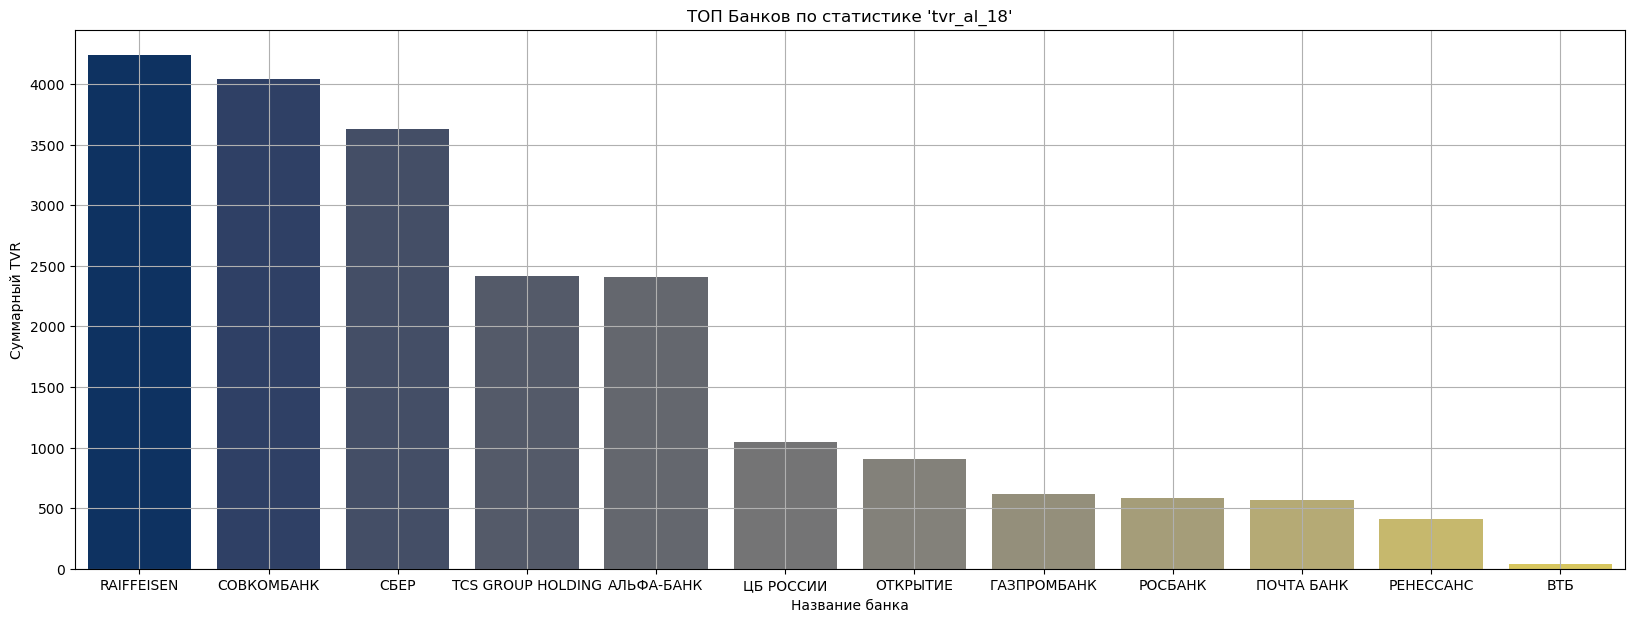

In [12]:
# Построение графика
plt.figure(figsize=(20, 7))
sns.barplot(x="Bank", y="Sum_tvr", data=summary_df, palette="cividis")
plt.title("ТОП Банков по статистике 'tvr_al_18'")
plt.xlabel("Название банка")
plt.ylabel("Суммарный TVR")
plt.grid()

plt.xticks(
    ticks=[i for i in range(len(top_banks))],
    labels=[
        "RAIFFEISEN",
        "СОВКОМБАНК",
        "СБЕР",
        "TCS GROUP HOLDING",
        "АЛЬФА-БАНК",
        "ЦБ РОССИИ",
        "ОТКРЫТИЕ",
        "ГАЗПРОМБАНК",
        "РОСБАНК",
        "ПОЧТА БАНК",
        "РЕНЕССАНС",
        "ВТБ",
    ],
)

plt.show()

### 4) Составить ChannelMix (Сплит в % по телеканалам) для ТОП 3 банка по статистике tvr_all_18 ###

In [13]:
# выдялем топ-3 банка среди всего топа
top_3_banks = top_banks[0:3]

In [14]:
# нормализуем TVR для каждого advertisers_list на каждом телеканале, чтобы в сумме было 100%
df["Normalized_TVR"] = df.groupby(["advertisers_list"])[
    "tvr_all_18"
].transform(lambda x: x / x.sum() * 100)

# составляем channelmix
ChannelMix = (
    df.groupby(["advertisers_list", "carrier"])["Normalized_TVR"]
    .sum()
    .reset_index()
    .sort_values(by="advertisers_list")
)

In [15]:
# составляем channelmix для топ-3 банков
ChannelMix_top3 = ChannelMix[ChannelMix['advertisers_list'].isin(top_3_banks)]
ChannelMix_top3

,advertisers_list,carrier,Normalized_TVR
18,RAIFFEISEN,ЧЕ,1.379969
17,RAIFFEISEN,ТНТ 4,1.414320
16,RAIFFEISEN,ТНТ,5.822471
15,RAIFFEISEN,ТВ-3,6.633479
14,RAIFFEISEN,ТВ ЦЕНТР,3.132232
12,RAIFFEISEN,РОССИЯ 24,3.478495
11,RAIFFEISEN,РОССИЯ 1,6.151093
10,RAIFFEISEN,РЕН ТВ,10.844471
13,RAIFFEISEN,СТС,3.813531
8,RAIFFEISEN,ПЯТНИЦА,1.535126


In [16]:
# развертка в виде сводной таблицы
pivoted_ChannelMix_top3 = ChannelMix_top3.pivot_table(index='advertisers_list', columns='carrier', values='Normalized_TVR', fill_value=0)
# pivoted_ChannelMix_top3['Total'] = pivoted_ChannelMix_top3.sum(axis=1)

pivoted_ChannelMix_top3

carrier,ДОМ КИНО,ДОМАШНИЙ,ЗВЕЗДА,КАРУСЕЛЬ,МАТЧ ТВ,МИР,МУЗ ТВ,НТВ,ПЕРВЫЙ КАНАЛ,ПЯТНИЦА,...,РОССИЯ 24,СОЛНЦЕ,СТС,СУББОТА,ТВ ЦЕНТР,ТВ-3,ТНТ,ТНТ 4,ЧЕ,Ю
advertisers_list,,,,,,,,,,,,,,,,,,,,,
RAIFFEISEN,2.020863,0.000000,4.633618,0.000000,2.198639,2.356916,0.44647,16.933515,16.277200,1.535126,...,3.478495,0.00000,3.813531,0.000000,3.132232,6.633479,5.822471,1.414320,1.379969,0.00000
СБЕР,0.146052,1.531856,2.405426,0.407416,2.373396,0.000000,0.00000,9.657163,11.337358,4.110403,...,6.429067,0.54593,5.973650,0.660758,5.070684,3.469207,3.989711,1.009759,2.885092,0.83169
СОВКОМБАНК,0.000000,0.000000,3.982905,0.000000,0.000000,3.762322,0.00000,11.025191,16.214414,0.161536,...,1.282659,0.00000,6.261526,0.000000,3.990199,5.565818,5.100338,0.643061,2.403030,0.00000


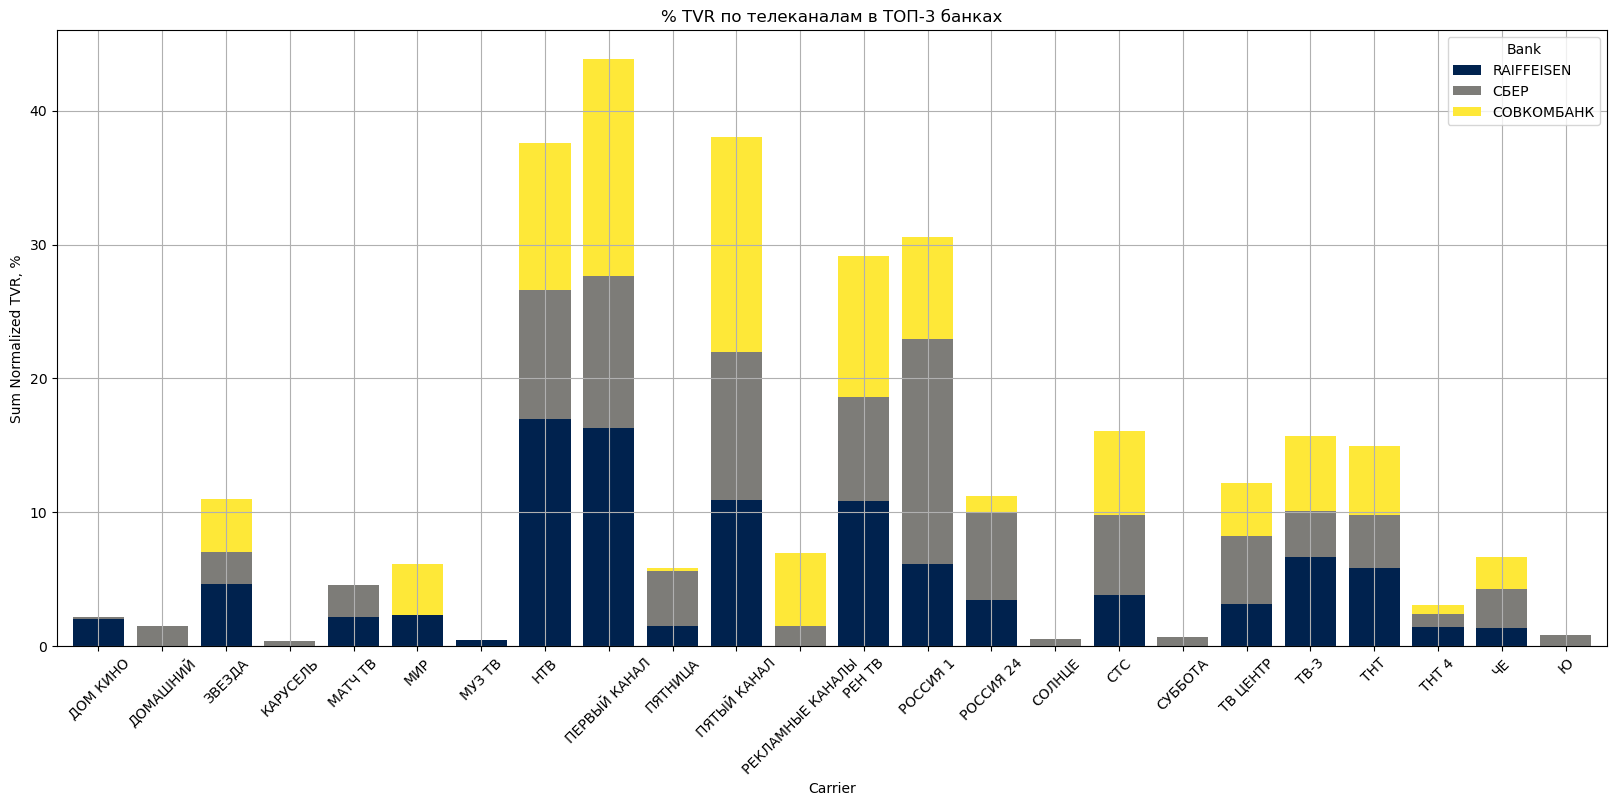

In [17]:
pivoted_ChannelMix_top3.T.plot(
    kind="bar", stacked=True, figsize=(20, 8), cmap="cividis", width=0.8
)
plt.title("% TVR по телеканалам в ТОП-3 банках")
plt.xlabel("Carrier")
plt.ylabel("Sum Normalized TVR, %")
plt.legend(title="Bank")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 5) Просчитать аффинитивность для ТОП-3 банка для статистики tvr_w_25 относительно tvr_all_18 ###

Affinity = (tvr_w_25_sum / tvr_all_18_sum) * 100

In [18]:
# группировка по advertisers_list и рассчет суммарных значений для каждой группы
aff_grouped = (
    df[df["advertisers_list"].isin(top_3_banks)]
    .groupby("advertisers_list")
    .agg({"tvr_w_25": "sum", "tvr_all_18": "sum"})
    .reset_index()
)

# Расчет аффинитивности
aff_grouped["Affinity"] = (aff_grouped["tvr_w_25"] / aff_grouped["tvr_all_18"]) * 100

aff_grouped[["advertisers_list", "Affinity"]]

,advertisers_list,Affinity
0,RAIFFEISEN,111.600260
1,СБЕР,113.832280
2,СОВКОМБАНК,114.077103


### 6) Посмотреть все уникальные значения в колонке models_list ####

In [19]:
df.models_list.unique().tolist()

['ВТБ УСЛУГИ БАНКОВ',
 'СОВКОМБАНК УСЛУГИ БАНКОВ',
 'СОВКОМБАНК УСЛУГИ БАНКОВ; СОВКОМБАНК ХАЛВА КРЕДИТНАЯ КАРТА',
 'ТИНЬКОФФ БАНК УСЛУГИ БАНКОВ',
 'ТИНЬКОФФ БАНК JUNIOR БАНКОВСКАЯ КАРТА; ТИНЬКОФФ БАНК УСЛУГИ БАНКОВ',
 'АЛЬФА-БАНК УСЛУГИ БАНКОВ',
 'СБЕР БАНК УСЛУГИ БАНКОВ',
 'ГАЗПРОМБАНК УСЛУГИ БАНКОВ',
 'СБЕР БАНК СБЕР БАНК ОНЛ@ЙН МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; СБЕР БАНК УСЛУГИ БАНКОВ',
 'MASTERCARD WORLD PLATINUM ТИНЬКОФФ БАНК КРЕДИТНАЯ КАРТА; ТИНЬКОФФ БАНК УСЛУГИ БАНКОВ',
 'БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; БРОКЕРКРЕДИТСЕРВИС УСЛУГИ ИНВЕСТИЦИОННЫХ КОМПАНИЙ; БРОКЕРКРЕДИТСЕРВИС УСЛУГИ ФИНАНСОВЫЕ',
 'БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; БРОКЕРКРЕДИТСЕРВИС УСЛУГИ ФИНАНСОВЫЕ',
 'VISA АЛЬФА-БАНК 100 ДНЕЙ БЕЗ ПРОЦЕНТОВ КРЕДИТНАЯ КАРТА',
 'ДОМКЛИК ИНТЕРНЕТ-АГРЕГАТОР НЕДВИЖИМОСТИ; ДОМКЛИК МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; СБЕР БАНК УСЛУГИ БАНКОВ',
 'ПЕНСИОННЫЙ ФОНД РОССИЙСКОЙ ФЕДЕРАЦИИ УСЛУГИ ПЕНСИОННЫХ ФОНДОВ',
 'RAIFFEISENBANK РАСЧЕТНЫЙ СЧЕТ ДЛЯ БИЗНЕСА; RAIFFEISENBANK УСЛУГИ БАНКОВ',
 'ТИНЬКОФФ БАНК

### 7) Придумать простую систему классификаций продуктов по колонке models_list. И добавить ее в новую колонку: segmentation ###

In [73]:
def classify_product(product):

    if "ИНВЕСТИЦИИ" in product or "ИНВЕСТИЦИОННЫХ" in product:
        return "Инвестиционные продукты"

    elif " КРЕДИТ " in product or "КРЕДИТНАЯ КАРТА" in product or 'КРЕДИТОВАНИЕ' in product:
        return "Кредитные продукты"

    elif "БАНКОВСКАЯ КАРТА" in product:
        return "Банковские карты"

    elif "ПЕНСИОННЫЙ" in product or "ПЕНСИЯ" in product:
        return "Пенсионные фонды"

    elif "АГРЕГАТОР" in product:
        return "Агрегатор финансовых услуг"

    elif "СТАРТ ПАКЕТ УСЛУГ ДЛЯ БИЗНЕСА" in product:
        return "Старт пакет услуг для бизнеса"
    
    elif 'РАСЧЕТНЫЙ СЧЕТ' in product:
        return 'Расчетные счета'
    
    elif 'ВКЛАДЫ' in product:
        return 'Вклады'

    elif "БАНКОВСКИЕ УСЛУГИ" in product or 'УСЛУГИ БАНКОВ':
        return "Прочие финансовые услуги"

    else:
        return "Другие услуги"


df["segmentation"] = df["models_list"].apply(classify_product)

In [74]:
df['segmentation'].value_counts(dropna=False)

segmentation
Кредитные продукты               13761
Инвестиционные продукты           5063
Агрегатор финансовых услуг        4125
Банковские карты                  4109
Расчетные счета                   4014
Старт пакет услуг для бизнеса     3076
Прочие финансовые услуги           599
Пенсионные фонды                   383
Вклады                             382
Name: count, dtype: int64

In [75]:
other_services_df = df.loc[df["segmentation"] == "Прочие финансовые услуги"]
other_services_df.sample(3)

,advertisement_id,advertisers_list,brands_list,models_list,carrier,advertisement_placement,advertisement_type,day,tvr_all_18,tvr_w_25,tvr_m_25,advertisement_duration,article_list_4,article_list_3,article_list_2,week,month,year,Normalized_TVR,segmentation
5261,4023450,БРОКЕРКРЕДИТСЕРВИС,БРОКЕРКРЕДИТСЕРВИС,БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; БРОКЕ...,ЗВЕЗДА,Сетевое,Ролик,2021-02-09,0.748930,0.286742,1.475054,15,МОБИЛЬНЫЕ ПРИЛОЖЕНИЯ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),РЕСУРСЫ В ИНТЕРНЕТ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),СРЕДСТВА МАССОВОЙ ИНФОРМАЦИИ; УСЛУГИ ФИНАНСОВЫЕ,2021-02-08,2021-02-01,2021,0.108852,Прочие финансовые услуги
2970,4023450,БРОКЕРКРЕДИТСЕРВИС,БРОКЕРКРЕДИТСЕРВИС,БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; БРОКЕ...,2X2,Сетевое,Ролик,2021-02-13,0.023445,0.016188,0.037152,15,МОБИЛЬНЫЕ ПРИЛОЖЕНИЯ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),РЕСУРСЫ В ИНТЕРНЕТ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),СРЕДСТВА МАССОВОЙ ИНФОРМАЦИИ; УСЛУГИ ФИНАНСОВЫЕ,2021-02-08,2021-02-01,2021,0.003408,Прочие финансовые услуги
4212,4023450,БРОКЕРКРЕДИТСЕРВИС,БРОКЕРКРЕДИТСЕРВИС,БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ; БРОКЕ...,ТНТ,Сетевое,Ролик,2021-02-19,0.764884,0.607074,0.779745,15,МОБИЛЬНЫЕ ПРИЛОЖЕНИЯ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),РЕСУРСЫ В ИНТЕРНЕТ; УСЛУГИ ФИНАНСОВЫЕ (РАЗНОЕ),СРЕДСТВА МАССОВОЙ ИНФОРМАЦИИ; УСЛУГИ ФИНАНСОВЫЕ,2021-02-15,2021-02-01,2021,0.111171,Прочие финансовые услуги


### 8) Сделать отчет о топ, как каждый банк из ТОП-3 распределяет рейтинги tvr_all_18 по продуктам из segmentation ###

In [144]:
df_top_3_banks = df[df["advertisers_list"].isin(top_3_banks)]

# сгруппируем данные по банкам и продуктам, а затем посчитаем суммарное TVR рейтинга для каждой группы
report = (
    df_top_3_banks.groupby(["advertisers_list", "segmentation"])["tvr_all_18"]
    .sum()
    .reset_index()
)

# Отсортируем отчет по TVR рейтингу в порядке убывания внутри банков
report_sorted = report.sort_values(
    by=["advertisers_list", "tvr_all_18"], ascending=False
)

In [145]:
report_sorted

,advertisers_list,segmentation,tvr_all_18
7,СОВКОМБАНК,Кредитные продукты,3618.369148
6,СОВКОМБАНК,Вклады,327.553176
8,СОВКОМБАНК,Прочие финансовые услуги,98.147284
5,СБЕР,Старт пакет услуг для бизнеса,2056.165426
2,СБЕР,Агрегатор финансовых услуг,1546.393500
4,СБЕР,Прочие финансовые услуги,23.963460
3,СБЕР,Банковские карты,2.103716
1,RAIFFEISEN,Расчетные счета,2738.057880
0,RAIFFEISEN,Банковские карты,1498.057398


In [139]:
# развертка в виде сводной таблицы
pivoted_report_sorted = report_sorted.pivot_table(index='advertisers_list', columns='segmentation', values='tvr_all_18', fill_value=0)

pivoted_report_sorted

segmentation,Агрегатор финансовых услуг,Банковские карты,Вклады,Кредитные продукты,Прочие финансовые услуги,Расчетные счета,Старт пакет услуг для бизнеса
advertisers_list,,,,,,,
RAIFFEISEN,0.0000,1498.057398,0.000000,0.000000,0.000000,2738.05788,0.000000
СБЕР,1546.3935,2.103716,0.000000,0.000000,23.963460,0.00000,2056.165426
СОВКОМБАНК,0.0000,0.000000,327.553176,3618.369148,98.147284,0.00000,0.000000


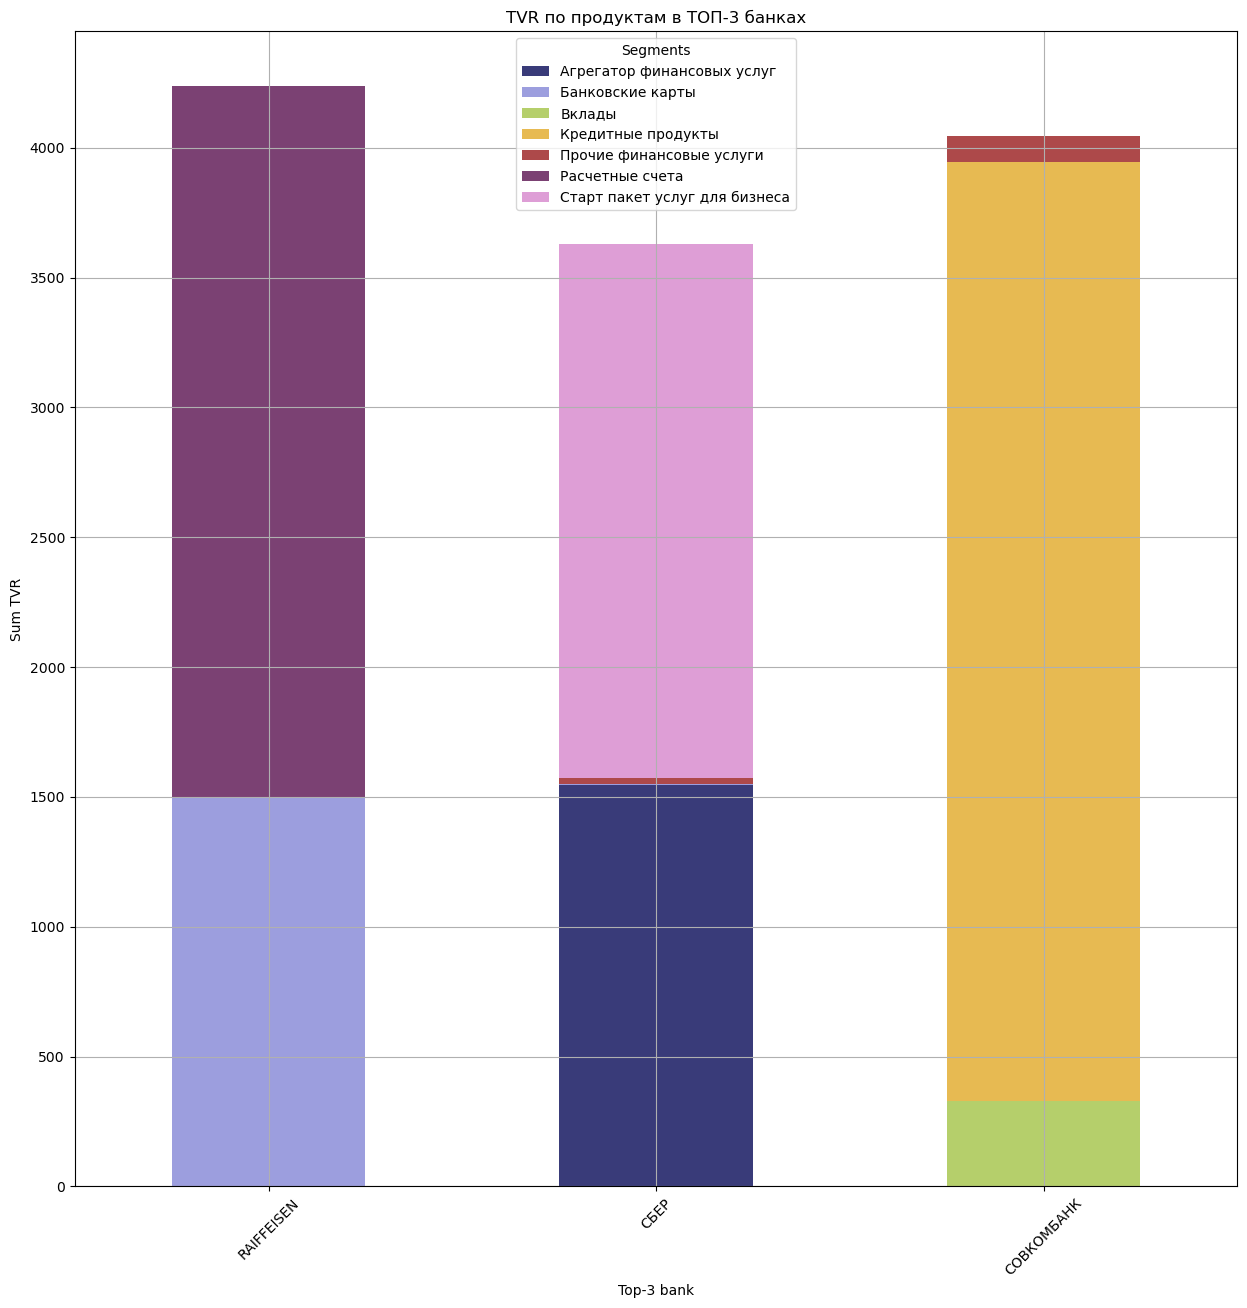

In [143]:
pivoted_report_sorted.plot(
    kind="bar", stacked=True, figsize=(15, 15), cmap="tab20b", width=0.5
)
plt.title("TVR по продуктам в ТОП-3 банках")
plt.xlabel("Top-3 bank")
plt.ylabel("Sum TVR")
plt.legend(title="Segments")
plt.xticks(rotation=45)
plt.grid()
plt.show()

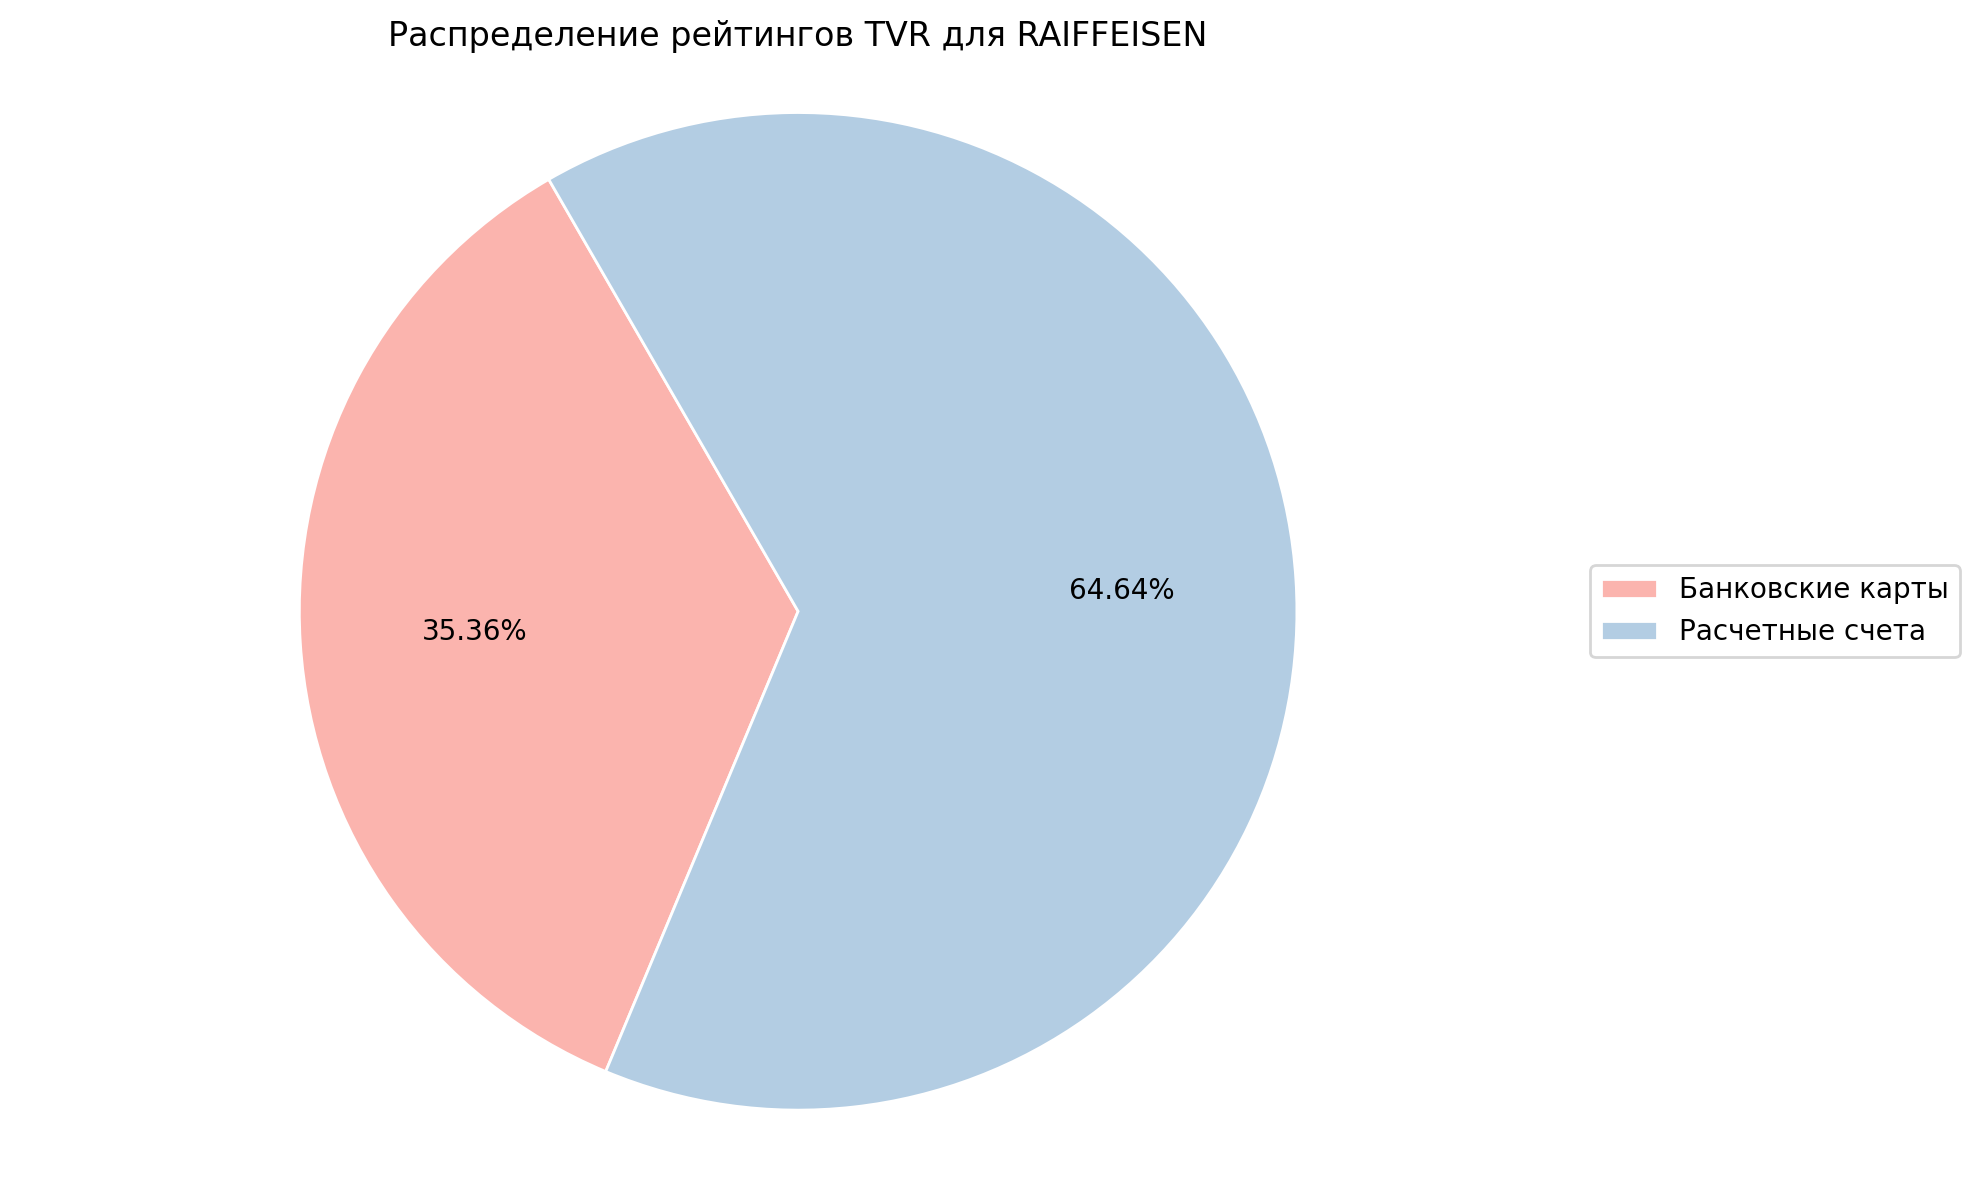

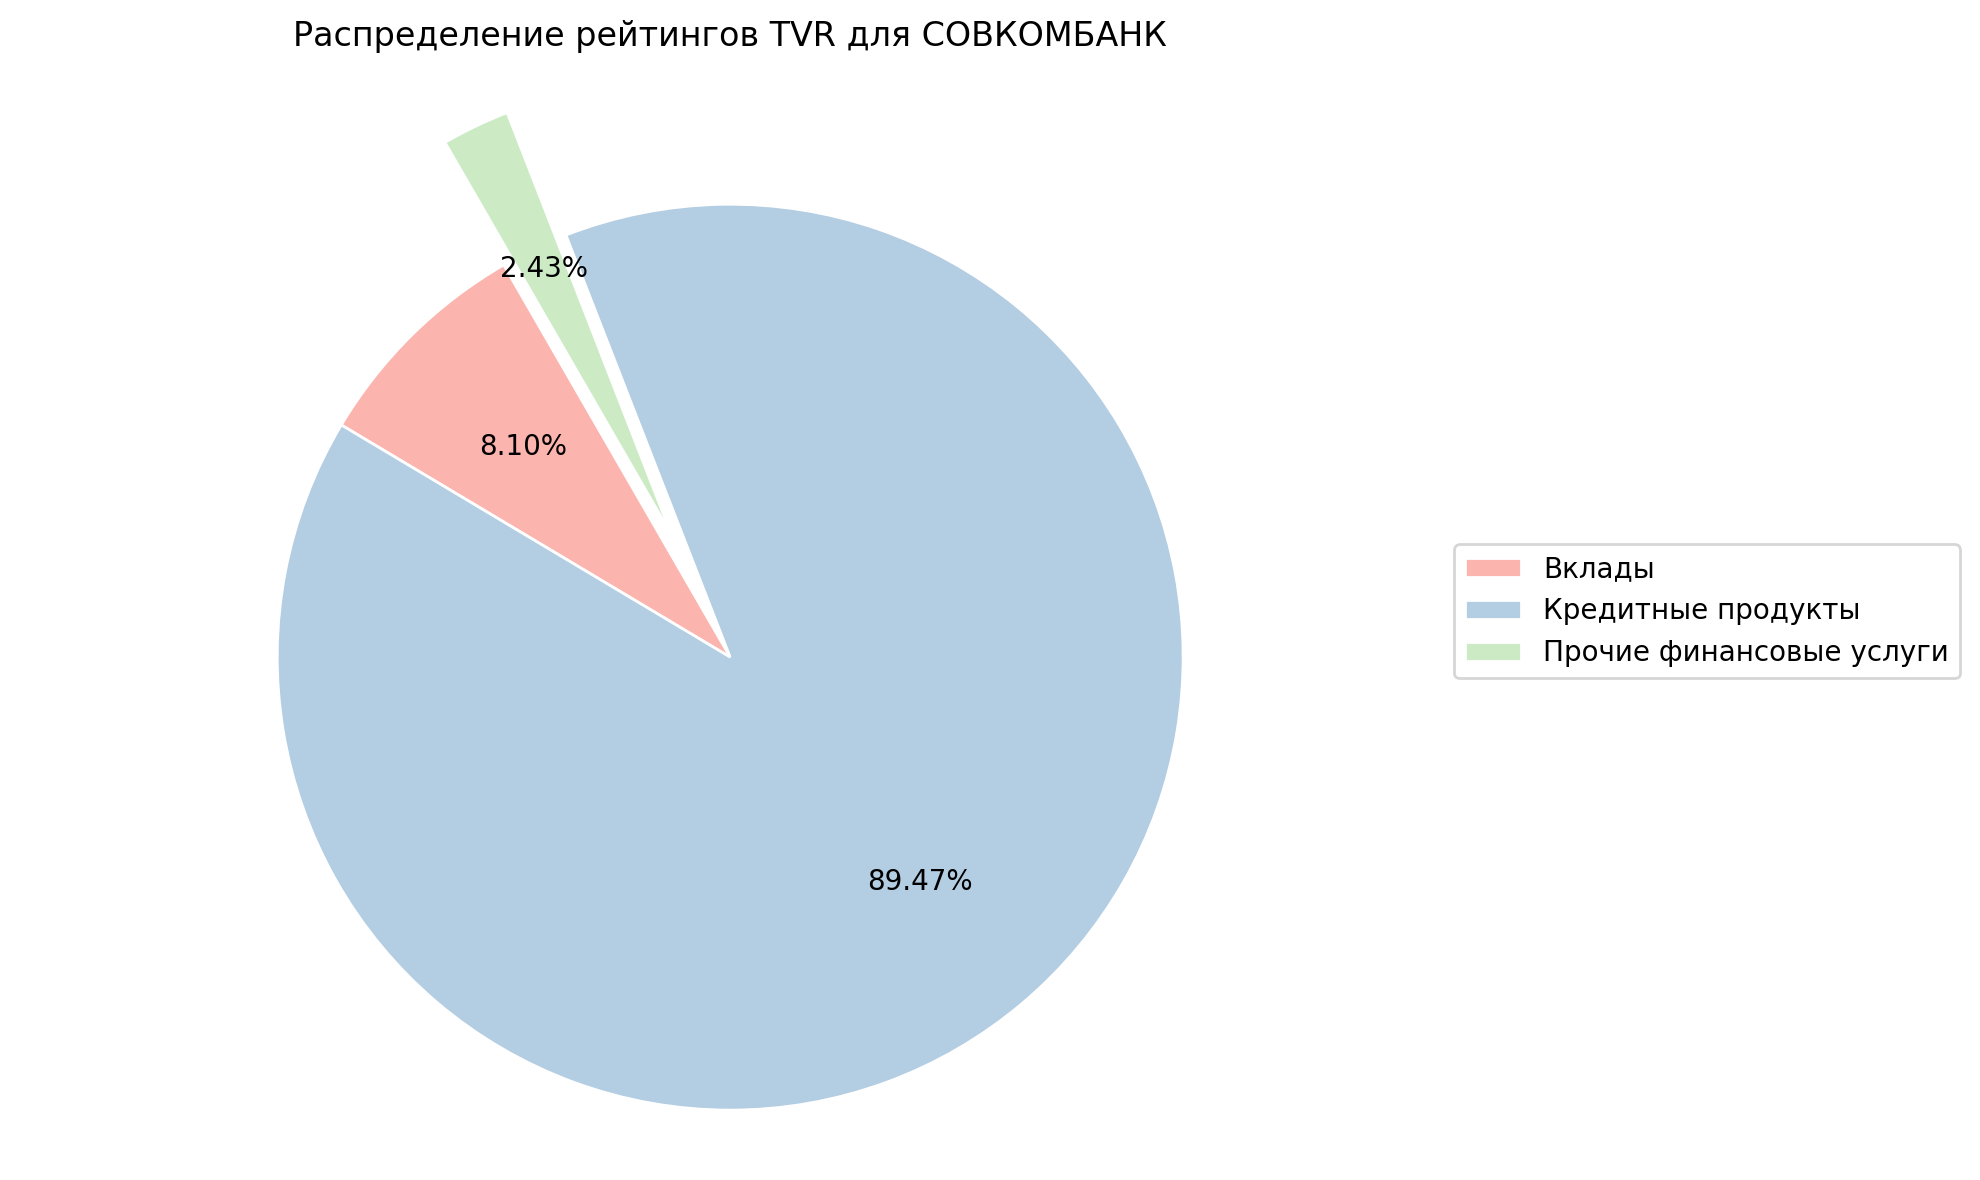

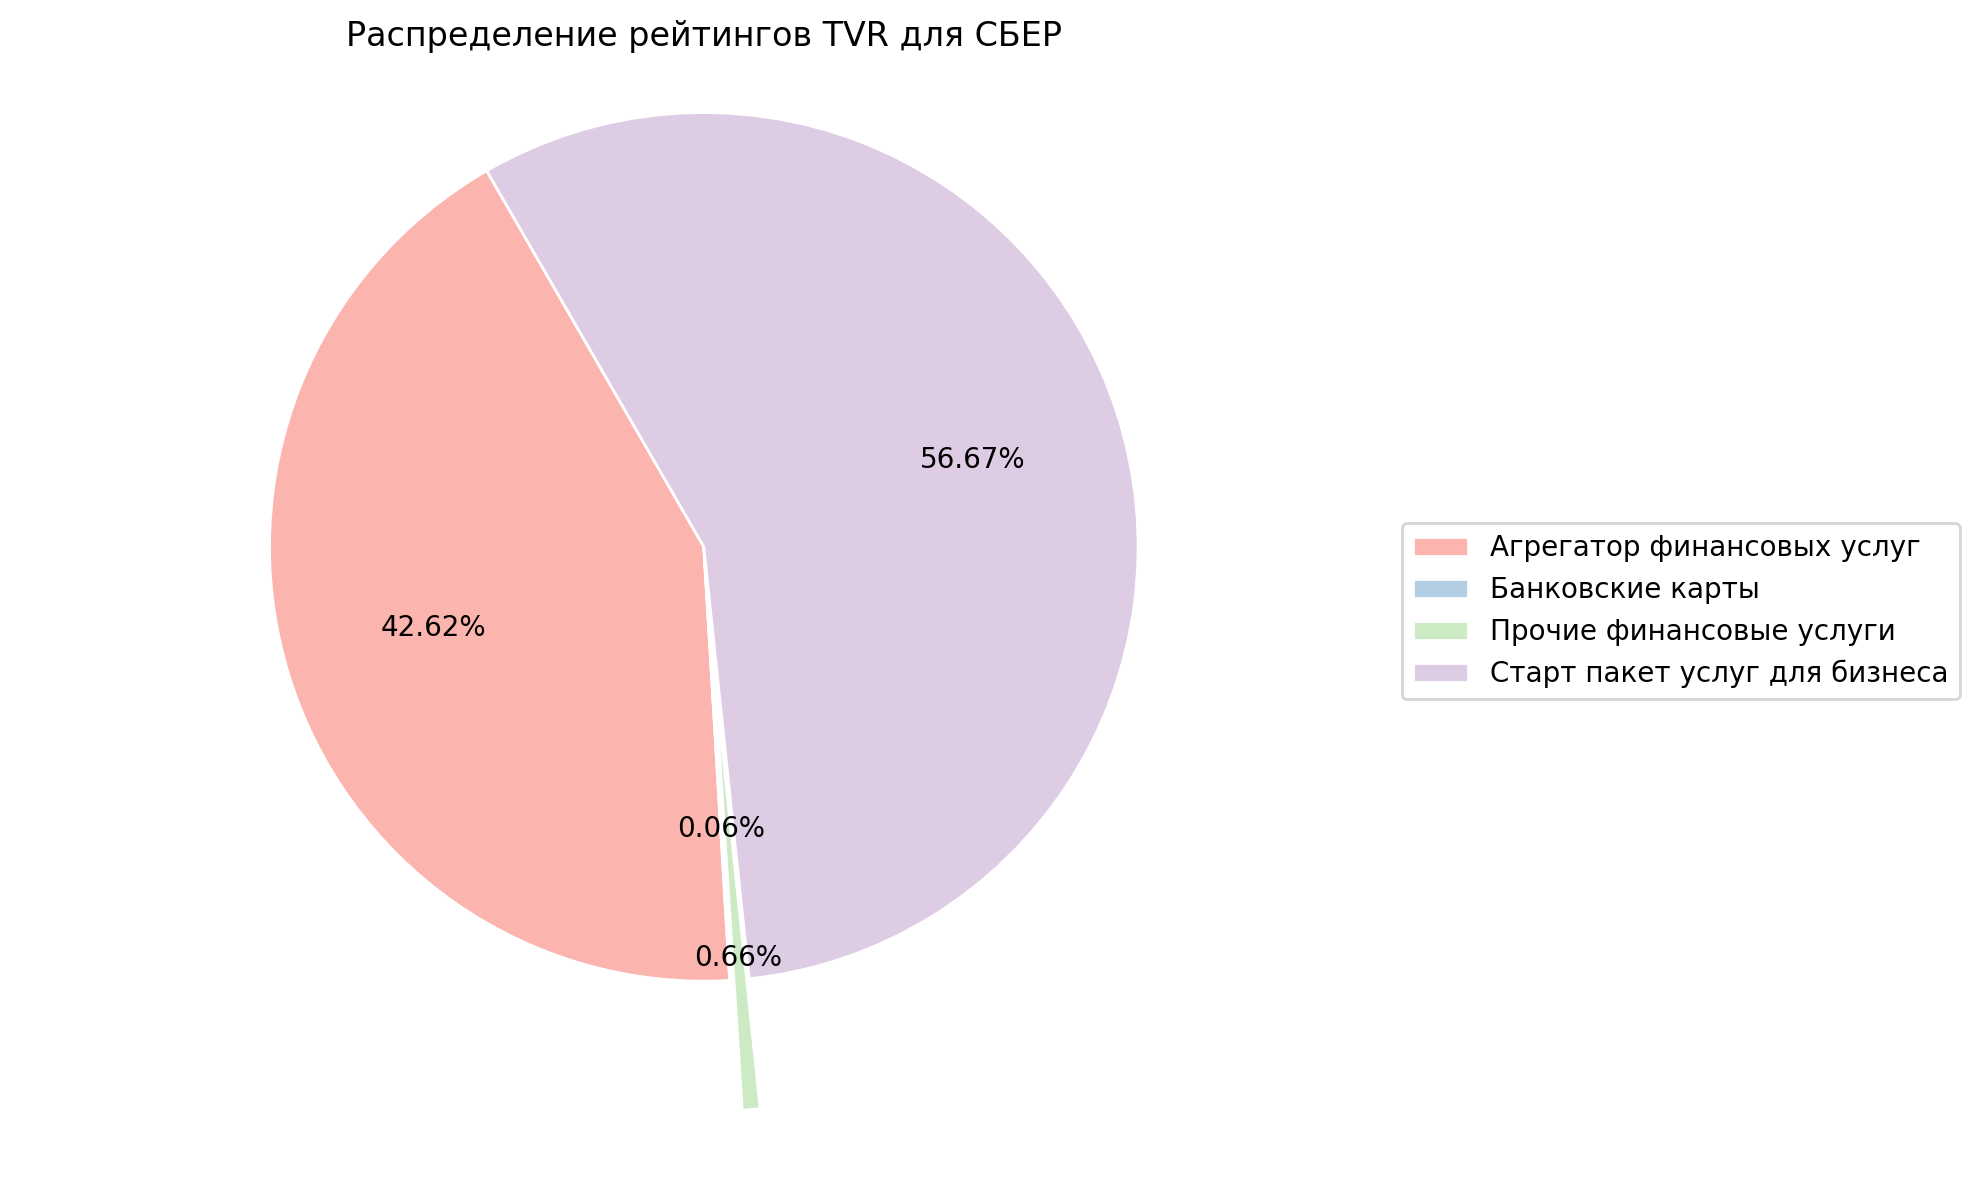

In [135]:
for bank in top_3_banks:
    bank_data = report[report["advertisers_list"] == bank]
    plt.figure(figsize=(10, 6), dpi=200)

    colors = plt.cm.Pastel1.colors[: len(bank_data)]

    explode = [
        0.3 if s == "Прочие финансовые услуги" else 0 for s in bank_data["segmentation"]
    ]

    plt.pie(
        bank_data["tvr_all_18"],
        autopct="%1.2f%%",
        startangle=120,
        pctdistance=0.65,
        colors=colors,
        wedgeprops=dict(edgecolor="w", linewidth=1),
        explode=explode,
    )
    plt.title(f"Распределение рейтингов TVR для {bank}")
    plt.axis("equal")

    plt.legend(bank_data["segmentation"], loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()